In [3]:
 import os
import librosa

In [4]:
def feature_extractor(file):
    audio_data,sample_rate = librosa.load(file,duration=1)
    mfcc_feature = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=40)
    scaled_feature = np.mean(mfcc_feature.T,axis=0)
    return scaled_feature

In [5]:
import numpy as np
mfccs_feature = []
classes = []
root_directory = '/kaggle/input/dialect2/Dialect_merge'
for folder in os.listdir(root_directory):
        folder_path = os.path.join(root_directory,folder)
        for file in os.listdir(folder_path)[:5000]:
            file_path = os.path.join(folder_path,file)
            mfccs_feature.append(feature_extractor(file_path))
            classes.append(folder)

In [6]:
import pandas as pd
df = pd.DataFrame({'MFCC_Features': mfccs_feature, 'Class': classes})
len(df['MFCC_Features'])

2752

In [7]:
new_df = df.sample(2752)
new_df.head()

,MFCC_Features,Class
1267,"[-460.11658, 24.514254, -7.46974, 8.306777, 5....",Midland_male
1228,"[-503.65872, 20.928005, -3.3727837, -3.3608444...",Scotish_male
109,"[-785.6731, 21.083307, 7.1556563, 6.17204, 0.5...",Scotish_female
574,"[-552.0133, 105.32879, -11.333716, 35.375393, ...",Welsh_male
2212,"[-616.74585, 76.38969, -9.697356, 1.2538278, -...",Southern_male


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

2024-04-23 18:07:07.063319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 18:07:07.063431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 18:07:07.208006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
lbl = LabelEncoder()
y = lbl.fit_transform(new_df['Class'])
X = np.array(new_df['MFCC_Features'].tolist())
y = np.array(y.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(40,)))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(225,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0919 - loss: 104.8539 - val_accuracy: 0.1053 - val_loss: 5.3846
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0838 - loss: 32.6563 - val_accuracy: 0.1125 - val_loss: 2.8303
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0998 - loss: 15.2180 - val_accuracy: 0.0817 - val_loss: 2.5702
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0840 - loss: 9.9607 - val_accuracy: 0.0926 - val_loss: 2.4111
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0882 - loss: 6.4982 - val_accuracy: 0.1071 - val_loss: 2.4021
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0917 - loss: 4.9780 - val_accuracy: 0.0889 - val_loss: 2.4184
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1006 - loss: 4.0416 - val_accuracy: 0.1143 - val_loss: 2.4227
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0895 - loss: 3.4950 - val_accuracy: 0.1216 - val_l

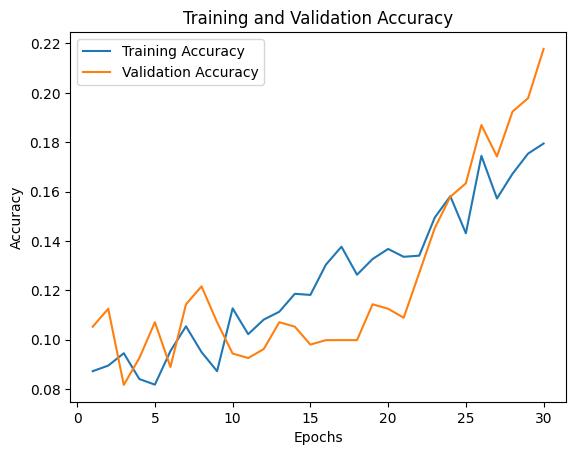

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add bidirectional LSTM layer
model.add(Bidirectional(LSTM(2048, return_sequences=True), input_shape=(None, 40)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(1024, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.5))

model.add(Dense(11, activation='softmax'))

# Compile the model
learning_rate = 0.001  # Set your desired learning rate here

# Create an instance of the Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, None, 4096)     │    34,226,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, None, 4096)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, None, 2048)     │    41,951,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, None, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 512)            │     4,720,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,903,691 (308.62 MB)

 Trainable params: 80,903,691 (308.62 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import numpy as np

# Reshape X_train
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# Verify the new shape
print("Original shape:", X_train.shape)
print("Reshaped shape:", X_train_reshaped.shape)

y_train_reshaped = np.reshape(y_train, (-1, 1))  # Assuming y_train is already one-dimensional
y_test_reshaped = np.reshape(y_test, (-1, 1))  # Assuming y_test is already one-dimensional

# Verify the new shapes
print("Original y_train shape:", y_train.shape)
print("Reshaped y_train shape:", y_train_reshaped.shape)
print("Original y_test shape:", y_test.shape)
print("Reshaped y_test shape:", y_test_reshaped.shape)

# Reshape X_test
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Verify the new shape
print("Original X_test shape:", X_test.shape)
print("Reshaped X_test shape:", X_test_reshaped.shape)

Original shape: (2201, 40)
Reshaped shape: (2201, 1, 40)
Original y_train shape: (2201,)
Reshaped y_train shape: (2201, 1)
Original y_test shape: (551,)
Reshaped y_test shape: (551, 1)
Original X_test shape: (551, 40)
Reshaped X_test shape: (551, 1, 40)


In [16]:
history = model.fit(X_train_reshaped,y_train_reshaped,epochs=50,batch_size=256,validation_data=(X_test_reshaped,y_test_reshaped))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1233 - loss: 2.3881 - val_accuracy: 0.2377 - val_loss: 2.1417
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.2332 - loss: 2.0998 - val_accuracy: 0.3376 - val_loss: 1.7843
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3534 - loss: 1.7821 - val_accuracy: 0.4229 - val_loss: 1.5782
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4351 - loss: 1.5318 - val_accuracy: 0.5408 - val_loss: 1.3146
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5259 - loss: 1.2951 - val_accuracy: 0.5935 - val_loss: 1.2230
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5921 - loss: 1.1724 - val_accuracy: 0.6152 - val_loss: 1.1222
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6363 - loss: 1.0759 - val_accuracy: 0.6661 - val_loss: 1.0212
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6817 - loss: 0.9576 - val_accuracy: 0.7169 - val_loss: 0.8318
Epoch 9/